This code belongs to SAURAV KUMAR(21D070063). In these file of code, i have written solution of problem 1. I have taken help from geeks for geeks youtube channel and its official website. link: https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/,
also from stachexchange, datacamp, tuitorialspoint.

part (a) and (b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR


 
# https://www.tutorialspoint.com/scikit_learn/index.htm

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')
print(df.shape)
df.head()
df.describe()


(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
df["quality"].value_counts()



quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [4]:
#geeks for geeks youtube channel

null = pd.concat([df.isnull().sum()], axis=1, keys=["df"])
null[null.sum(axis=1) > 0]

,df


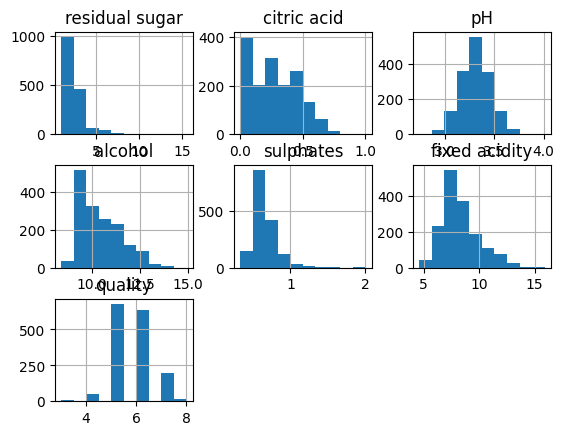

In [5]:
viz = df[['residual sugar','citric acid','pH', 'alcohol', 'sulphates', 'fixed acidity', 'quality']]
viz.hist()
plt.show()

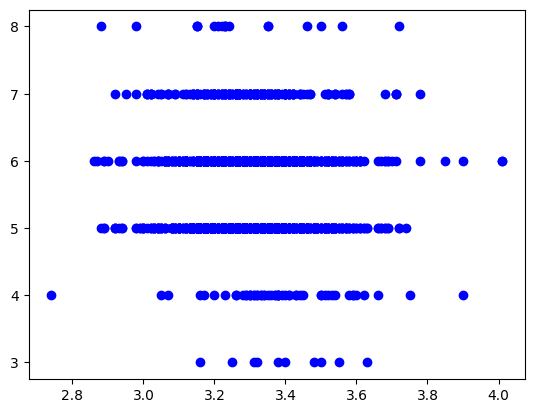

      residual sugar  citric acid    pH  alcohol  sulphates  fixed acidity  \
0                1.9         0.00  3.51      9.4       0.56            7.4   
1                2.6         0.00  3.20      9.8       0.68            7.8   
2                2.3         0.04  3.26      9.8       0.65            7.8   
3                1.9         0.56  3.16      9.8       0.58           11.2   
4                1.9         0.00  3.51      9.4       0.56            7.4   
...              ...          ...   ...      ...        ...            ...   
1594             2.0         0.08  3.45     10.5       0.58            6.2   
1595             2.2         0.10  3.52     11.2       0.76            5.9   
1596             2.3         0.13  3.42     11.0       0.75            6.3   
1597             2.0         0.12  3.57     10.2       0.71            5.9   
1598             3.6         0.47  3.39     11.0       0.66            6.0   

      quality  
0           5  
1           5  
2           5  

In [6]:
plt.scatter(np.array(viz['pH']),np.array(viz['quality']), color='blue')
plt.show()
print(viz)

part (c) and  (d):

(1599, 11)
(1599,)
0.29431399999999996


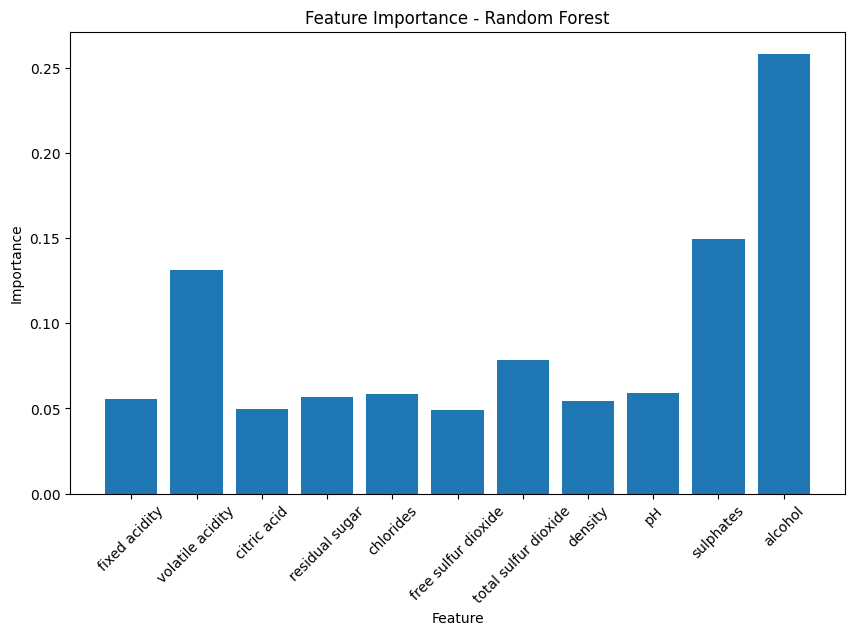

(4898, 11)
(4898,)
0.40713673469387757


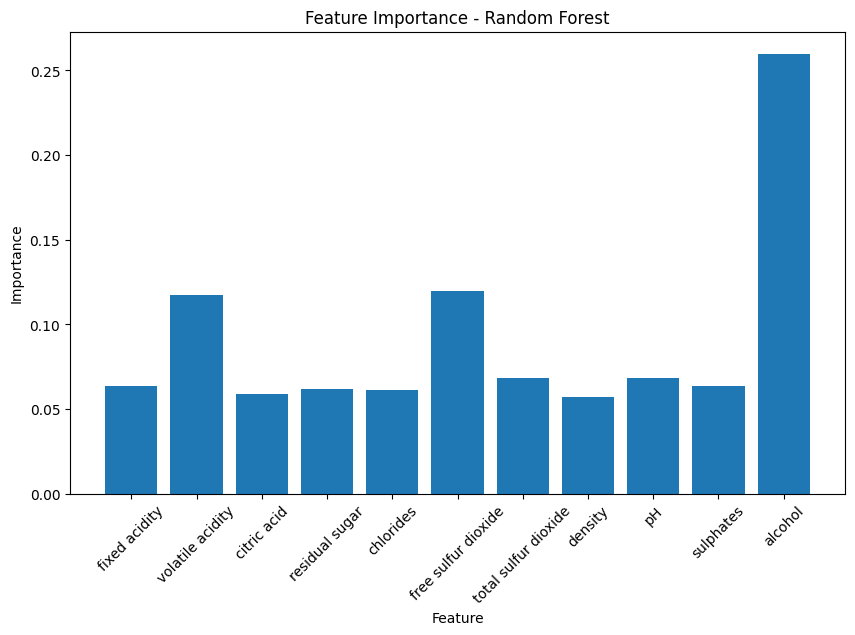

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/

def randomforest(d) :
 
 X = d.iloc[:,:-1]
 y = d.iloc[:,-1]
 print(X.shape)
 print(y.shape)
 X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)
 
 rf = RandomForestClassifier()
 rf.fit(X_train, y_train)

 rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
 rf_model.fit(X_train, y_train)

 rf_test_predictions = rf_model.predict(X_test)
 rf_test_mse = mean_squared_error(y_test, rf_test_predictions) 
 print(rf_test_mse)

 # Variable Importance Analysis
 # Feature importance for Random Forest
 feature_importance_rf = rf_model.feature_importances_ 

 # Visualization of variable importance
 plt.figure(figsize=(10, 6))
 plt.bar(X.columns, feature_importance_rf)
 plt.title('Feature Importance - Random Forest')
 plt.xlabel('Feature')
 plt.ylabel('Importance')
 plt.xticks(rotation=45)
 plt.show()

randomforest(df)
randomforest(df_white)


 

Observation: All the feature are not of same importance as we can see in the graph. Alcohol, sulphates and volatile acidity have more importance than others.

(1599, 11)
(1599,)
0.5713696594000904


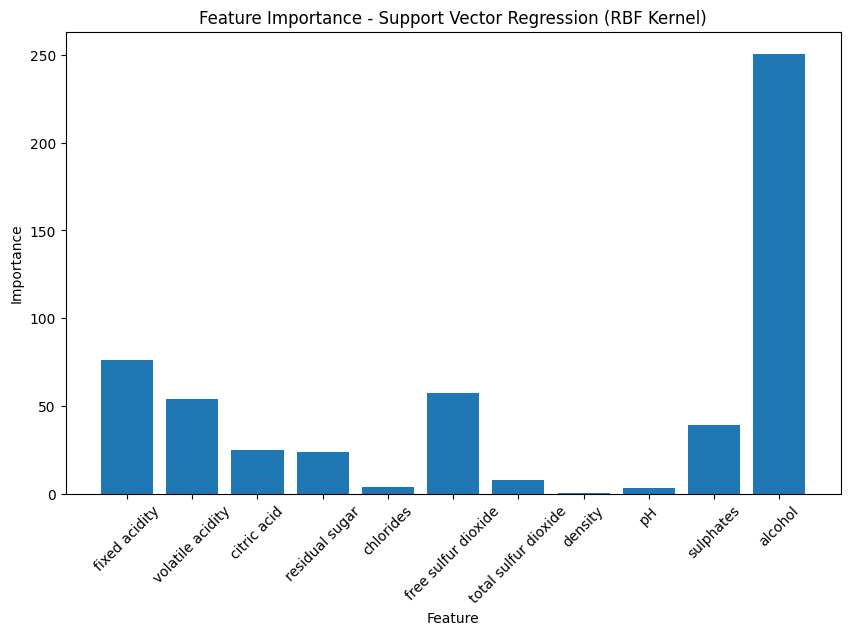

(4898, 11)
(4898,)
0.6751495124994232


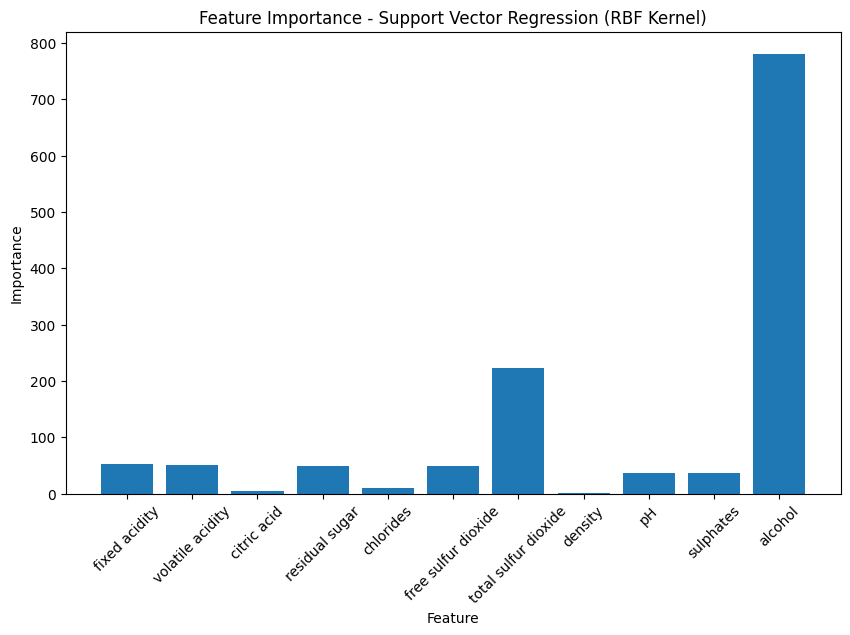

In [8]:
# https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/

# Support Vector Regression with RBF kernel
def SVM(d):
 X = d.iloc[:,:-1]
 y = d.iloc[:,-1]
 print(X.shape)
 print(y.shape)
 X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)
 

 svr_model = SVR(kernel='rbf')
 svr_model.fit(X_train, y_train)

 svr_test_predictions = svr_model.predict(X_test)
 svr_test_mse = mean_squared_error(y_test, svr_test_predictions)
 print(svr_test_mse)

 support_vectors = svr_model.support_vectors_
 dual_coefficients = svr_model.dual_coef_[0]

 # Calculate feature importance based on dual coefficients and support vectors
 feature_importance_svr = np.abs(np.dot(dual_coefficients, support_vectors))

 # Visualize feature importance
 plt.figure(figsize=(10, 6))
 plt.bar(X.columns, feature_importance_svr)
 plt.title('Feature Importance - Support Vector Regression (RBF Kernel)')
 plt.xlabel('Feature')
 plt.ylabel('Importance')
 plt.xticks(rotation=45)
 plt.show()

SVM(df)
SVM(df_white)

observation: All the feature are not of same importance as we can see in the graph. Alcohol, total sulpher dioxide and fixed acidity have more importance than others.

Part (e):

In [9]:
#testing red whine with white wine data
def test_red_with_white():
 X = df.iloc[:,:-1]
 y = df.iloc[:,-1]
 X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)
 X1 = df_white.iloc[:,:-1]
 y1 = df_white.iloc[:,-1]
 X1_train,  X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size= 0.25)
 

 svr_model = SVR(kernel='rbf')
 svr_model.fit(X_train, y_train)

 svr_test_predictions = svr_model.predict(X1_test)
 svr_test_mse = mean_squared_error(y1_test, svr_test_predictions)
 print(svr_test_mse)


test_red_with_white()



1.2997906609028642


Result: mean square error comes out to be relatively very high , thus we conclude that model for red wines is not applicable to white wine since eman square error is very high a similar conclusion can be drawn for vice versa.
